<img src='netflix_amazon.jpg'/>


# Introdução
Vamos analisar os dados de duas grandes plataformas de streaming: Netflix e Amazon Prime e tirar alguns insights a cerca disso.


# Analisando os dados

In [213]:
#Importando as bibliotecas
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import datetime
from itertools import chain


In [214]:
#Carregando o dataframe netflix
df_netflix = pd.read_csv('netflix_titles.csv', sep = ',',encoding='utf-8') 
df_netflix.head ()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [215]:
#Verificando a quantidade de registros
df_netflix.count()

show_id         8807
type            8807
title           8807
director        6173
cast            7982
country         7976
date_added      8797
release_year    8807
rating          8803
duration        8804
listed_in       8807
description     8807
dtype: int64

In [216]:
#Verificando se os titulos são únicos e distintos
df_netflix['title'].nunique()

8807

In [217]:
#Verificando os valores nulos
df_netflix.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [218]:
#Carregando o dataframe da amazon prime
df_amazon_prime = pd.read_csv('amazon_prime_titles.csv', sep = ',',encoding='utf-8') 
df_amazon_prime.head ()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,NaN,113 min,"Comedy, Drama",A small fishing village must procure a local d...
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,NaN,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,NaN,69 min,Documentary,"Pink breaks the mold once again, bringing her ..."
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,NaN,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...


In [219]:
#Verificando a quantidade de registros
df_amazon_prime.count()

show_id         9668
type            9668
title           9668
director        7586
cast            8435
country          672
date_added       155
release_year    9668
rating          9331
duration        9668
listed_in       9668
description     9668
dtype: int64

In [220]:
#Verificando se os titulos são únicos e distintos
df_amazon_prime['title'].nunique()

9668

In [221]:
#Verificando os valores nulos
df_amazon_prime.isnull().sum()

show_id            0
type               0
title              0
director        2082
cast            1233
country         8996
date_added      9513
release_year       0
rating           337
duration           0
listed_in          0
description        0
dtype: int64

In [222]:
#Fixando em uma nova coluna a plataforma respectiva de cada dataset
df_netflix['plataforma'] ='netflix'
df_amazon_prime['plataforma'] ='amazon_prime'

#  Mesclar os datasets
Para montar o nosso dataset único, vamos utilizar o outer join, pois assim conseguimos pegar não só apenas os filmes comuns, mas também todos os titulos das duas base de dados.
Utilizando como chave as colunas title e type, pois os títulos são únicos em cada type


In [223]:
#Mesclar os dados
query = pd.merge(df_netflix,
                 df_amazon_prime,
                 on=['title','type'],
                 how='outer')

In [224]:
query.head()

,show_id_x,type,title,director_x,cast_x,country_x,date_added_x,release_year_x,rating_x,duration_x,...,director_y,cast_y,country_y,date_added_y,release_year_y,rating_y,duration_y,listed_in_y,description_y,plataforma_y
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020.0,PG-13,90 min,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021.0,TV-MA,2 Seasons,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021.0,TV-MA,1 Season,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021.0,TV-MA,1 Season,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021.0,TV-MA,2 Seasons,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [225]:
query.count()

show_id_x          8807
type              18145
title             18145
director_x         6173
cast_x             7982
country_x          7976
date_added_x       8797
release_year_x     8807
rating_x           8803
duration_x         8804
listed_in_x        8807
description_x      8807
plataforma_x       8807
show_id_y          9668
director_y         7586
cast_y             8435
country_y           672
date_added_y        155
release_year_y     9668
rating_y           9331
duration_y         9668
listed_in_y        9668
description_y      9668
plataforma_y       9668
dtype: int64

In [226]:
query.isnull().sum()

show_id_x          9338
type                  0
title                 0
director_x        11972
cast_x            10163
country_x         10169
date_added_x       9348
release_year_x     9338
rating_x           9342
duration_x         9341
listed_in_x        9338
description_x      9338
plataforma_x       9338
show_id_y          8477
director_y        10559
cast_y             9710
country_y         17473
date_added_y      17990
release_year_y     8477
rating_y           8814
duration_y         8477
listed_in_y        8477
description_y      8477
plataforma_y       8477
dtype: int64

In [227]:
#Criando colunas que contemplem os campos do mesmo assunto
query['cast'] = query['cast_x']
query['cast'].fillna(query['cast_y'], inplace=True)
query['listed_in'] = query['listed_in_x']
query['listed_in'].fillna(query['listed_in_y'], inplace=True)
query['plataforma'] = query['plataforma_x']
query['plataforma'].fillna(query['plataforma_y'], inplace=True)
query['country'] = query['country_x']
query['country'].fillna(query['country_y'], inplace=True)

In [228]:
query.isnull().sum()

show_id_x          9338
type                  0
title                 0
director_x        11972
cast_x            10163
country_x         10169
date_added_x       9348
release_year_x     9338
rating_x           9342
duration_x         9341
listed_in_x        9338
description_x      9338
plataforma_x       9338
show_id_y          8477
director_y        10559
cast_y             9710
country_y         17473
date_added_y      17990
release_year_y     8477
rating_y           8814
duration_y         8477
listed_in_y        8477
description_y      8477
plataforma_y       8477
cast               2032
listed_in             0
plataforma            0
country            9529
dtype: int64

# Top 10 atores/atrizes considerando todos os dados

In [229]:
q = query['cast'].dropna()
q1 = q.str.split(",")
Lista1 = list(chain(*q1))
df = pd.DataFrame(Lista1)
df.replace('^\s+', '', regex=True, inplace=True) #front
df.replace('\s+$', '', regex=True, inplace=True) #end
df.value_counts()[:10]

Anupam Kher         57
Maggie Binkley      56
Amitabh Bachchan    44
Nassar              43
Shah Rukh Khan      40
Akshay Kumar        40
Paresh Rawal        38
Naseeruddin Shah    38
Danny Trejo         36
1                   35
dtype: int64

Text(0, 0.5, 'Atores')

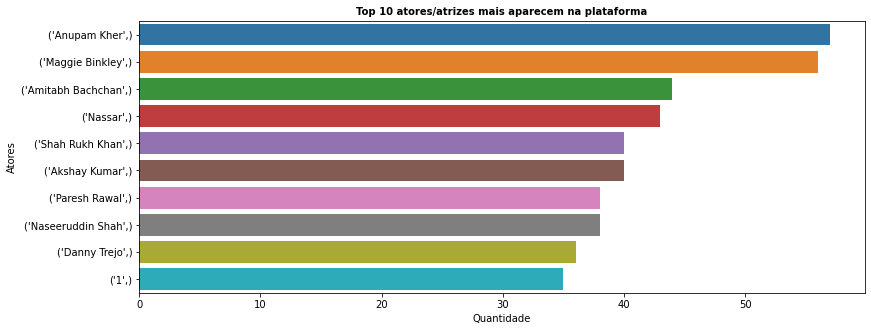

In [230]:
a,ax=plt.subplots(figsize=(18,5))
categoria = df.value_counts().index[:10]
qtd = df.value_counts()[:10]
sns.barplot(x= qtd, y = categoria, data=df).figure.set_size_inches(13, 5)
plt.title("Top 10 atores/atrizes mais aparecem na plataforma", fontsize=10, fontweight='bold')
plt.xlabel("Quantidade")
plt.ylabel("Atores")

Podemos ainda localizar quais são os filmes que esses atores participam

In [231]:
df = query[query['cast'].str.contains('Anupam Kher', na = False)]
df['title']

192                                    C Kkompany
202                             Kyaa Kool Hai Hum
204                      Kyaa Super Kool Hain Hum
205             Kyo Kii... Main Jhuth Nahin Bolta
702                       Silver Linings Playbook
1861                                          Dil
2270                              Chashme Baddoor
2289                                   Special 26
2339                         Prem Ratan Dhan Payo
2340                                        Vivah
2564                   One Day: Justice Delivered
2724                         Gori Tere Pyaar Mein
2725                                       Gumrah
2734                           Kuch Kuch Hota Hai
2957                          Hum Aapke Hain Koun
3136                                         Game
4466                                     Zokkomon
4612                                  Wake Up Sid
4679                                 Naam Shabana
4694                        Toilet: Ek Prem Katha


# Top 5 países produtores de conteúdos considerando todos os dados e comparando as duas plataformas;

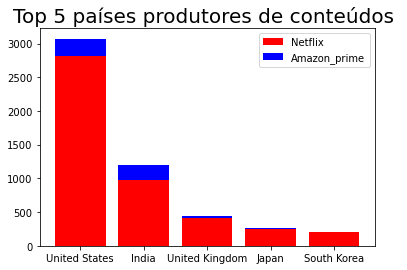

In [232]:
import matplotlib.pyplot as plt 
x = query['country'].value_counts().index[:5]
y1 = query['country_x'].value_counts()[:5]
y2 = query['country_y'].value_counts()[:5]
plt.bar(x, y1, color='r') 
plt.bar(x, y2, bottom=y1, color='b')
plt.legend(["Netflix", "Amazon_prime"]) #conferir
plt.title('Top 5 países produtores de conteúdos ',fontsize=20)
plt.show() 

# Mês no qual há mais adições de filmes na plataforma Netflix;

In [233]:
#Localizando os dados que são da plataforma Netflix e do type Movie
df = query.loc[query['plataforma'] == 'netflix']
df = df.loc[df['type']== 'Movie']

In [234]:
#Formatando o campo de data pelo mês
data_col = pd.DatetimeIndex(df['date_added_x'])
df['month'] = data_col.month

In [235]:
#Formatando o mês, por extenso e colocando em ordem
new_values = {1.:'January', 2.:'February', 3.:'March', 4.:'April', 5.:'May',
              6.:'June', 7.:'July', 8.:'August', 9.:'September', 10.:'October',
              11.:'November', 12.:'December'}
df['month_1'] = df['month'].map(new_values)

July         565
April        550
December     547
January      546
October      545
March        529
September    519
August       519
November     498
June         492
May          439
February     382
Name: month_1, dtype: int64


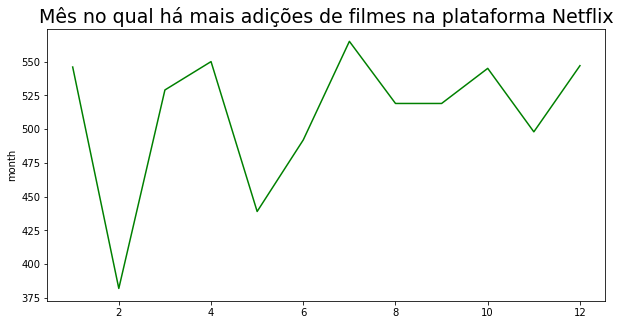

In [236]:
print(df['month_1'].value_counts())
categorias = df['month'].value_counts().index
qtd = df['month'].value_counts()
fig = plt.figure(figsize=(10,5))
sns.lineplot(x=categorias,y=qtd, color = 'green')
plt.title('Mês no qual há mais adições de filmes na plataforma Netflix', fontsize=19);

# Lista de todos os gêneros de filmes                                                                           

# Quantidade de filmes listados como comédia.

In [237]:
#Localizando o type Movie
df1 = query.loc[query['type'] == 'Movie']

In [238]:
#Listando os generos 
df = df1['listed_in'].dropna()
q1 = df.str.split(",")
from itertools import chain
Lista1 = list(chain(*q1))
df = pd.DataFrame(Lista1,columns=['Generos'])
df.replace('^\s+', '', regex=True, inplace=True) #front
df.replace('\s+$', '', regex=True, inplace=True) #end
df.value_counts()[:50]

Generos                  
Drama                        3089
International Movies         2752
Dramas                       2427
Comedy                       1737
Comedies                     1674
Action                       1450
Suspense                     1316
Documentaries                 869
Action & Adventure            859
Horror                        816
Independent Movies            756
Special Interest              688
Documentary                   665
Kids                          663
Children & Family Movies      641
Romantic Movies               616
Thrillers                     577
Romance                       569
Arts                          420
Entertainment                 420
and Culture                   420
Science Fiction               390
Music & Musicals              375
Horror Movies                 357
Stand-Up Comedy               343
Animation                     276
International                 270
Sci-Fi & Fantasy              243
Sports Movies         

No entanto, percebemos que temos referencias similares para o mesmo estilo de gênero. Sendo assim vamos classificar ainda mais
nossos dados para verficar o gênero Comedia

In [239]:
df['Comedia'] = df[df['Generos'].str.contains('Comed', na = False)]
df['Comedia'].value_counts()

Comedy             1737
Comedies           1674
Stand-Up Comedy     343
Name: Comedia, dtype: int64

Vamos utilizar o mesmo recurso para os demais gêneros comuns

In [240]:
df['Drama'] = ''
df['Drama'] = df[df['Generos'].str.contains('Drama', na = False)]
df['Drama'].value_counts()

Drama     3089
Dramas    2427
Name: Drama, dtype: int64

In [241]:
df['Horror'] = ''
df['Horror'] = df[df['Generos'].str.contains('Horror', na = False)]
df['Horror'].value_counts()

Horror           816
Horror Movies    357
Name: Horror, dtype: int64

In [242]:
df['Kids'] = ''
df['Kids'] = df[df['Generos'].str.contains('Kids','Children', na = False)]
df['Kids'].value_counts()

Kids    663
Name: Kids, dtype: int64

In [243]:
df['Documentary'] = ''
df['Documentary'] = df[df['Generos'].str.contains('Documentary', na = False)]
df['Documentary'].value_counts()

Documentary    665
Name: Documentary, dtype: int64

In [244]:
df['Suspense'] = ''
df['Suspense'] = df[df['Generos'].str.contains('Suspense', na = False)]
df['Suspense'].value_counts()


Suspense    1316
Name: Suspense, dtype: int64

In [245]:
df['Romance'] = ''
df['Romance'] = df[df['Generos'].str.contains('Roman', na = False)]
df['Romance'].value_counts()


Romantic Movies    616
Romance            569
Name: Romance, dtype: int64

In [246]:
df['Science_Fiction'] = ''
df['Science_Fiction'] = df[df['Generos'].str.contains('Sci', na = False)]
df['Science_Fiction'].value_counts()

Science Fiction     390
Sci-Fi & Fantasy    243
Name: Science_Fiction, dtype: int64

In [247]:
df['Action'] = ''
df['Action'] = df[df['Generos'].str.contains('Action', na = False)]
df['Action'].value_counts()

Action                1450
Action & Adventure     859
Name: Action, dtype: int64

In [248]:
#Listando os registros de generos filtrados
df1 = df['Comedia'].dropna()
comedia = df1.tolist()
df1 = df['Drama'].dropna()
drama = df1.tolist()
df1 = df['Horror'].dropna()
horror = df1.tolist()
df1 = df['Kids'].dropna()
kids = df1.tolist()
df1 = df['Documentary'].dropna()
documentary = df1.tolist()
df1 = df['Suspense'].dropna()
suspense = df1.tolist()
df1 = df['Romance'].dropna()
romance = df1.tolist()
df1 = df['Science_Fiction'].dropna()
science_fiction = df1.tolist()
df1 = df['Action'].dropna()
action = df1.tolist()

Text(0.5, 0, 'Quantidade')

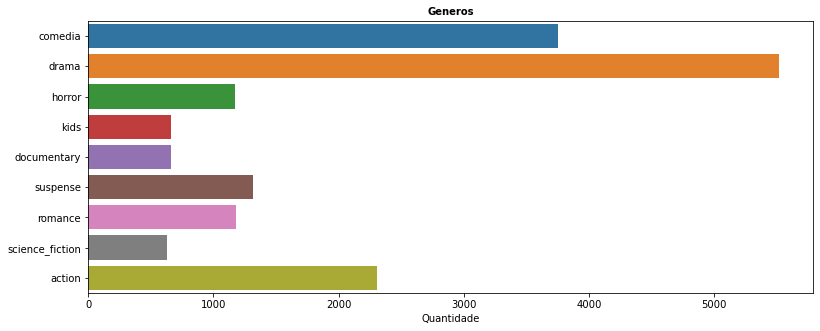

In [249]:
a,ax=plt.subplots(figsize=(18,5))
categoria = ['comedia','drama','horror','kids','documentary','suspense','romance','science_fiction','action']
qtd = [len(comedia), len(drama), len(horror), len(kids),len(documentary),len(suspense),len(romance),len(science_fiction),len(action)]
sns.barplot(x= qtd, y = categoria).figure.set_size_inches(13, 5)
plt.title("Generos", fontsize=10, fontweight='bold')
plt.xlabel("Quantidade")


#  A frequência de "TV Show" de todos os dados e comparativamente em relação as duas plataformas

netflix         2676
amazon_prime    1783
Name: plataforma, dtype: int64


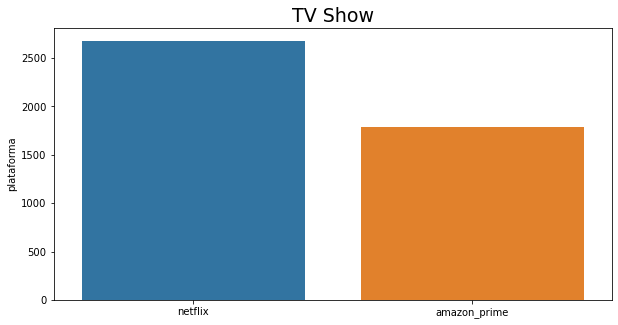

In [250]:
df = query.loc[query['type'] == 'TV Show']
categorias = df[u'plataforma'].value_counts().index
qtd = df['plataforma'].value_counts() 
print(qtd)
fig = plt.figure(figsize=(10,5))
sns.barplot(x= categorias, y = qtd, data=df)
plt.title('TV Show', fontsize=19);

# A frequência de "Movies" de todos os dados e comparativamente em relação as duas plataformas

amazon_prime    7555
netflix         6131
Name: plataforma, dtype: int64


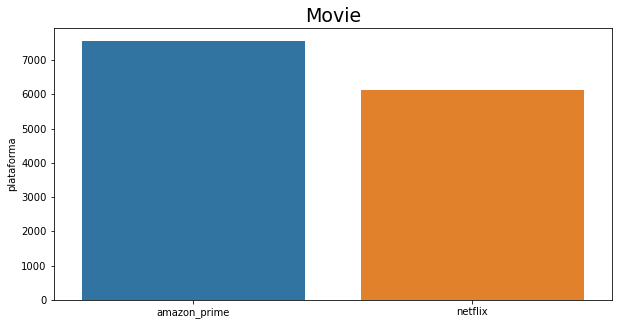

In [251]:
df1 = query.loc[query['type'] == 'Movie']
categorias = df1[u'plataforma'].value_counts().index
qtd = df1['plataforma'].value_counts() 
print(qtd)
fig = plt.figure(figsize=(10,5))
sns.barplot(x= categorias, y = qtd, data=df1)
plt.title('Movie', fontsize=19);